In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.integrate import quad
from scipy import integrate as intg
import sympy as sp
from scipy import stats
from scipy.interpolate import UnivariateSpline
import pandas as pd
from scipy.stats import linregress
from scipy.stats import norm
import os
import seaborn as sns
from matplotlib import pyplot as plt, patches
import matplotlib.patches as mpatches
import statistics 
import tkinter as tk
from tkinter import messagebox
import base64
import requests

In [26]:
def QuickLoader (Gal): 
    wave1 = pd.DataFrame(Gal, columns= ['WAVE'])
    err1 = pd.DataFrame(Gal, columns= ['ERR'])
    flux1 = pd.DataFrame(Gal, columns= ['FLUX'])
    cont1 = pd.DataFrame(Gal, columns= ['CONT'])
    wave01 = pd.DataFrame.to_numpy(wave1)
    error01 = pd.DataFrame.to_numpy(err1)
    flux01 = pd.DataFrame.to_numpy(flux1)
    cont01 = pd.DataFrame.to_numpy(cont1)
    error02 = ((error01.flatten()))
    flux = ((flux01.flatten()))
    wave = ((wave01.flatten()))
    cont = ((cont01.flatten()))
    error = error02/cont
    Gal_master = [flux,wave,cont,error]
    return Gal_master
def v90calc(wave,flux,line,vrange):
    vrange_upper = vrange[0]
    vrange_lower= vrange[1]
    velocity= c*(wave-line)/line
    
    velocityrange = (flux>T) & (velocity>vrange_lower)  & (velocity<vrange_upper) & (velocity < -70)
    v90array= (velocity[velocityrange])
    v90 = v90array.max()
    
    Wvelocityrange = ((flux<T) & (velocity<vrange_upper) & (velocity>vrange_lower))
    wvel=np.sum((1-flux[Wvelocityrange])*(velocity[Wvelocityrange]))/(np.sum(1-flux[Wvelocityrange]))
    
    EWvelocityrange = ((flux<T) & (velocity<vrange_upper) & (velocity>vrange_lower))
    #print (wave[EWvelocityrange])
    equivelentwidth= np.trapz(1-flux[EWvelocityrange],wave[EWvelocityrange],
                              (wave[EWvelocityrange][0],wave[EWvelocityrange][-1]))
    Allval = [v90,wvel,equivelentwidth]
    return Allval

def splinefit(cutoff):
    cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
    spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
    spline_fit= spline_med(wave)
    flux_cont = FC/spline_fit
    return flux_cont

c= 2.99e5
mksize = 34
T = .9
x0= 1393.76
x1= 1190.416
x2= 1193.28
x3= 1304.37
x4= 1334.532
x5= 1402.770
x6= 1260.42
x7=1302.168
x8=1206.51
x9=1121.967
x10=1125.442
x11=1143.220
x12=1144.926

In [20]:
SBS0926 =pd.read_csv ('https://raw.githubusercontent.com/Astro-CMalhas/Malhas-et-al.-in-prep/main/Galaxy%20CSV%20Files/SBS0926%2B606A.csv')
CG274= pd.read_csv ('https://raw.githubusercontent.com/Astro-CMalhas/Malhas-et-al.-in-prep/main/Galaxy%20CSV%20Files/CG274.csv')
IC2779 = pd.read_csv ('https://raw.githubusercontent.com/Astro-CMalhas/Malhas-et-al.-in-prep/main/Galaxy%20CSV%20Files/IC2779.csv')
Shoc22 = pd.read_csv ('https://raw.githubusercontent.com/Astro-CMalhas/Malhas-et-al.-in-prep/main/Galaxy%20CSV%20Files/Shoc22.csv')
Ask208 = pd.read_csv ('https://raw.githubusercontent.com/Astro-CMalhas/Malhas-et-al.-in-prep/main/Galaxy%20CSV%20Files/ASK208.csv')
NGC6090 = pd.read_csv ('https://raw.githubusercontent.com/Astro-CMalhas/Malhas-et-al.-in-prep/main/Galaxy%20CSV%20Files/NGC6090.csv')

AllGal = [SBS0926,CG274,IC2779, Shoc22, Ask208]

SBS0926_master = QuickLoader(SBS0926)
CG274_master = QuickLoader(CG274)
IC2779_master = QuickLoader(IC2779)
Shoc22_master = QuickLoader(Shoc22)
Ask208_master = QuickLoader(Ask208)
NGC6090_master = QuickLoader(NGC6090)
#print (Shoc22_master )
allfiles = ( SBS0926_master,CG274_master, IC2779_master,Shoc22_master,Ask208_master, NGC6090_master)


In [21]:
#Here is the cell where all the galaxies are loaded in and we use the Quickloader to Get them in the ideal format
allfiles = ( SBS0926_master,CG274_master, IC2779_master,Shoc22_master,Ask208_master, NGC6090_master)

In [22]:
[SBS0926_SiIIIrange,SBS0926_SiIIrange,SBS0926_SiIVrange,SBS0926_OIrange,SBS0926_CIrange ]= [ (1202,1205.4,1207,1213.5) ,(1190.8,1192.25,1193.4,1195), 
                                                    (1387,1392.4,1395,1398), (1295.8,1301,1302.45,1305), 
                                                    (1328,1333.4,1337,1341)]
[siIIIrange_CG274,siIIrange_CG274,siIVrange_CG274,OIrange_CG274,CIrange_CG274 ]= [(1201.8,1205.5,1207,1213.5),(1190.8,1192.25,1194,1196),
                                                                                  (1387,1392.4,1395,1398),
                                                                                  (1297.5,1300,1302.45,1305),(1326,1333,1335.8,1338)]
[siIIIrange_Shoc22,siIIrange_Shoc22,siIVrange_Shoc22,OIrange_Shoc22,CIrange_Shoc22 ]= [ (1200,1205,1207,1213.5) ,(1302,1303,1304.6,1308), (1388,1392.4,1395,1398), (1295.8,1301,1302.45,1305), (1326,1333,1335.8,1338)]
[siIIIrange_IC2779,siIIrange_IC2779,siIVrange_IC2779,OIrange_IC2779,CIrange_IC2779 ]= [  (1198,1201,1203,1205), (1185,1189,1191.2,1193), (1385,1391,1395,1398), (1297,1301,1302.7,1303.6), (1322.5,1333,1335.8,1338)]
[siIIIrange_ASK208,siIIrange_ASK208,siIVrange_ASK208,OIrange_ASK208,CIrange_ASK208 ]= [ (1200,1205,1207,1213.5) ,(1302,1303,1304.6,1308.2), (1388,1392.4,1395,1398), (1299.4,1300.25,1302.45,1304), (1326,1333,1335.8,1338)]

[siIIIrange_NGC6090,siIIrange_NGC6090,siIVrange_NGC6090,OIrange_NGC6090,CIrange_NGC6090 ]= [ (1201.5,1203.5,1207.5,1212) ,(1255,1258.2,1261.4,1264), 
                                                                                            (1385.5,1391,1395,1400), (1298,1300.7,1305,1308.2), (1328.25,1332,1335.5,1338.5)]

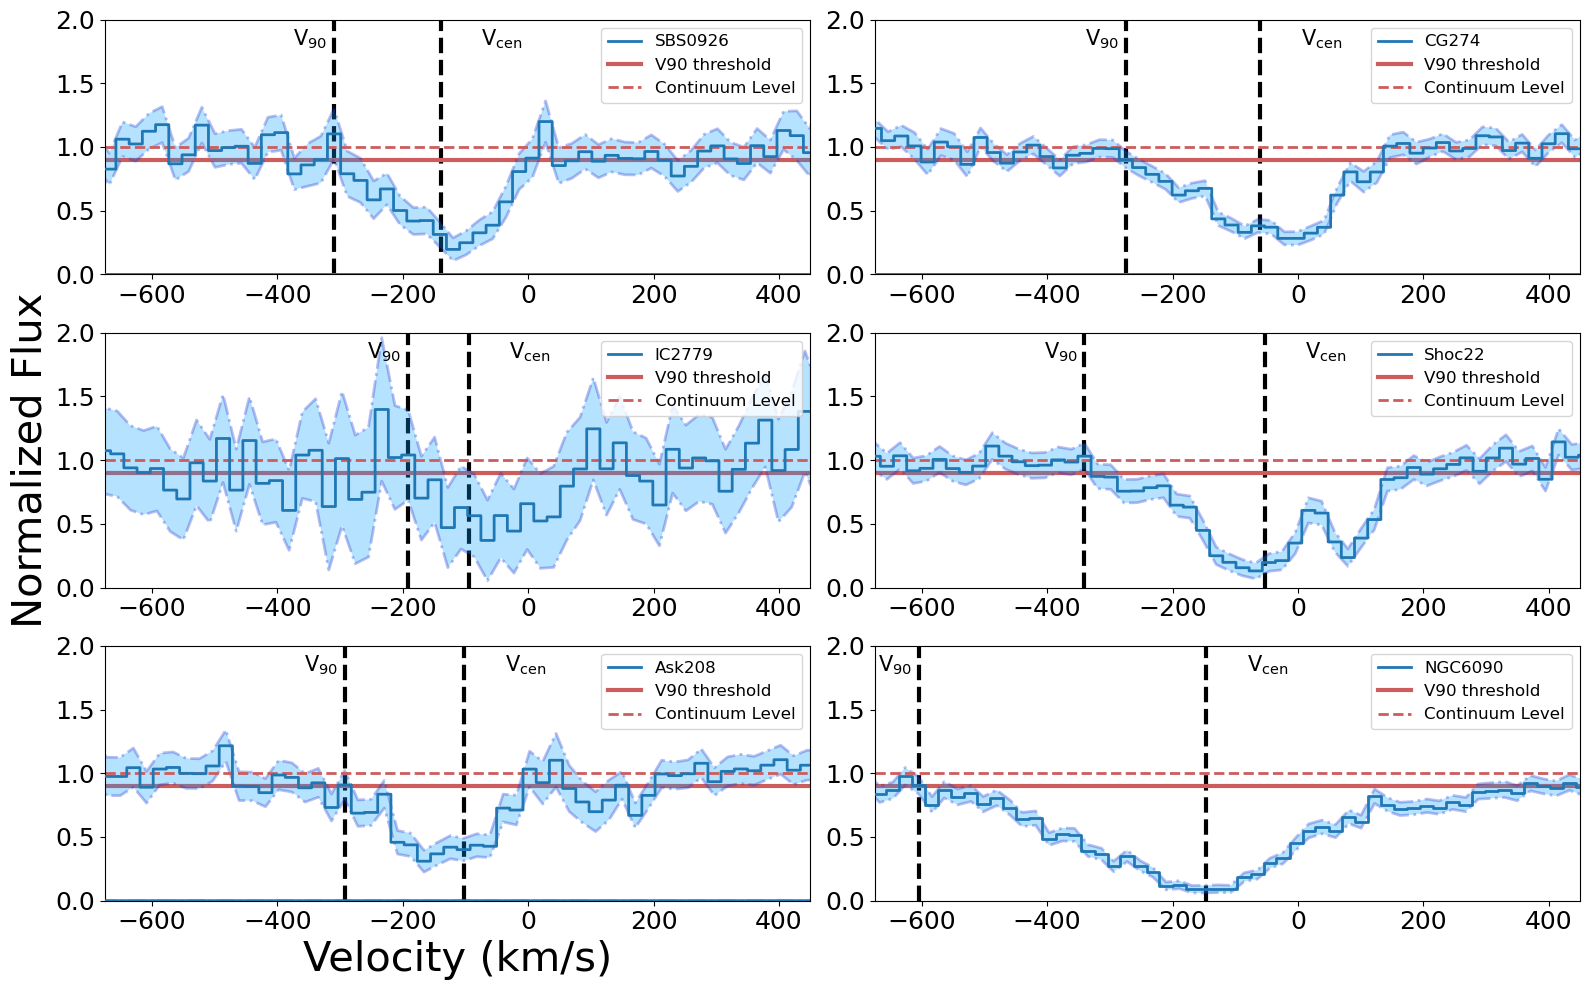

In [31]:
#allfiles = ( SBS0926_master,CG274_master, IC2779_master,Shoc22_master,Ask208_master, NGC6090_master)

fig = plt.figure(figsize=(16,10))
#fig.suptitle('Velocity (km/s)', fontsize=30, y = 0)
#fig.suptitle('All 6 Galaxies Si IV Velocity Calculations', fontsize=30, y = 1.05)

#spline_siIVrange_CG274
allarr = (SBS0926_SiIVrange,siIVrange_CG274,siIVrange_IC2779,siIVrange_Shoc22,siIVrange_ASK208)

toplotgalname = ('SBS0926','CG274','IC2779','Shoc22','Ask208','NGC6090')

for i in range (len(allfiles)):
    #print (i)
    currentgal = allfiles[i]
    error = currentgal[3]
    flux = currentgal[0]
    wave = currentgal[1]
    cont = currentgal[2]

    FC = flux/cont

# Spline Fitting
    z = i+1
    ax=fig.add_subplot(3,2,z)

    
#Velocity Calculations    
    line = (x0)
    vel = c*(wave-line)/line
    #print (len(vel))


    title = (toplotgalname[i])
    if i <5:
        cutoff= (allarr[i])
        flux_cont = splinefit(cutoff)
        SiIV_calc = v90calc(wave,flux_cont,x0,(200,-400))
        xaxis,yaxis = vel,flux_cont
        ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    #print (i)
    if i ==5:
        #print (len(flux))
        #print (len(cont))
        flux_cont = flux/cont
        SiIV_calc = v90calc(wave,flux_cont,x0,(430,-680))
        xaxis,yaxis = vel,flux_cont
        ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

        

    
    #ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 5.0, zorder = 3)
    ax.axhline (y=.9,color = '#CD5C5C', label = 'V90 threshold', linewidth = 3, zorder = 1)

    #print (SiIV_calc[0])
    vel90_line = SiIV_calc[0]
    velcen_line = SiIV_calc[1]
    #ax.axvline (x= velcen_line, color = '#77BA99', linewidth = '4.5', label= r'$\rm V_{\rm cen}$', zorder = 2)
    #ax.axvline (x=vel90_line, color = '#A96DA3', linewidth = '4.5', label= r'$\rm V_{\rm 90}$', zorder = 2)
    
    #Velocity vertical lines
    ax.axvline (x= vel90_line, color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=velcen_line, color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(velcen_line +65,1.8,r'$\rm V_{\rm cen}$', fontsize = 15)
    plt.text(vel90_line - 65,1.8,r'$\rm V_{\rm 90}$', fontsize = 15)
    
    #error ribbons
    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=2, linestyle='dashdot', antialiased=True)
    
    #axis titles
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = 30)
    if i == 4:    
        #ax.xaxis.set_label_position('bottom')
        ax.set_xlabel("Velocity (km/s)", fontsize = 30)
    yticks = np.arange(0,2.5,.5)
    ax.set_xlim([-675,450])
    ax.set_ylim([.0,2])
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", linewidth = 2)
    plt.yticks(yticks,fontsize=18)
    plt.xticks(fontsize=18)
    #ax.set_ylabel("Normalized Flux", fontsize = 35)
    leg = ax.legend(prop={"size":12}, loc = 1,bbox_to_anchor=(1, 1) )
    #ax.set_title(title, fontsize =40)

plt.tight_layout()
plt.savefig("Figure4AllGal.png", dpi = 300)
plt.show()